To run the following code, you need Julia (1.0 or higher) and the packages PyPlot and ProgressMeter (the other being already included). The basic code is in the file functions.jl.

In [6]:
using PyPlot, ProgressMeter
using LinearAlgebra, Random, Statistics
include("implicit_bias_2NN_utils.jl");

experiment_2NN

See the paper for details on the setting. In all experiments below, the letters stand for the following:
- $d\geq 2$ is the input data dimension
- $k$ is the number of cluster per dimensions (over $2$ dimensions)
- $n$ is the number of training samples
- $m$ is the number of neurons


# Illustration: setting and comparison of classifiers

First, we plot a sample of training set and compare what the classifier we obtain by training both layers or a single layer of the neural network.

In [7]:
Random.seed!(1)
k = 4
n = 100
m = 500

500

251.518775 seconds (41.43 M allocations: 487.819 GiB, 15.12% gc time)
379.

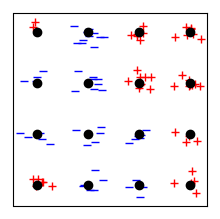

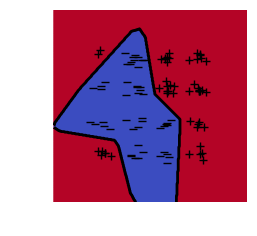

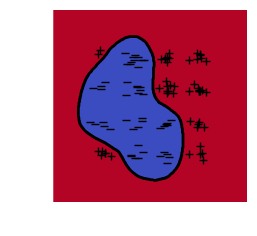

182787 seconds (46.80 M allocations: 491.446 GiB, 14.62% gc time)


In [8]:
illustration(k, n, m; niter=300000, name="classifier") # 12 minutes with 300000 iterations

# Experiment 1: performance vs n

We look at the evolution of the performance when the number of samples increases.

In [ ]:
Random.seed!(1)
n_distrib = 1 # number of repetition of the experiment
ds = [15]
ns = [32, 64 , 128, 256, 512]
n_repeat = 1
ms = [1000];

In [ ]:
@time L1s, L2s, m1s, m2s = experiment_2NN(n_distrib, ds, ns, n_repeat, ms, niter=50000, stepsize=0.5);

In [ ]:
figure(figsize=[4,3])
plot(ns,L1s[:,1,:,1,1]',"C0--",alpha=0.2)
plot(ns,L2s[:,1,:,1,1]',"C1--",alpha=0.2)
plot(ns,mL1,"C0", linewidth=4,label="both layers")
plot(ns,mL2,"C1", linewidth=4,label="output layer")
xlabel(L"n", fontsize=15)
ylabel("Test error", fontsize=15)
legend()
#savefig("test_vs_n_k3_5.pdf",bbox_inches="tight")
#ax.set_yticklabels(["{:,}".format(int(x)) for x in ax.get_yticks().tolist()])

# Experiment 2: performance vs d

We look at the evolution of the performance when the dimension increases.

In [ ]:
Random.seed!(1)
n_distrib = 1
ds = [5, 10, 15, 20, 25]
ns = [256]
n_repeat = 1
ms = [1000];
n_repeat = 1;

In [ ]:
@time L1s, L2s, m1s, m2s = experiment_2NN(n_distrib, ds, ns, n_repeat, ms, niter=50000, stepsize=0.5);

In [ ]:
figure(figsize=[4,3])
plot(ds,L1s[:,:,1,1,1],"C0--",alpha=0.2)
plot(ds,L2s[:,:,1,1,1],"C1--",alpha=0.2)
plot(ds,sum(L1s[:,:,1,1,1], dims=2)/n_rep,"C0", linewidth=4,label="both layers")
plot(ds,sum(L2s[:,:,1,1,1], dims=2)/n_rep,"C1", linewidth=4,label="output layer")
xlabel(L"d",fontsize=15)
ylabel("Test error",fontsize=15)
legend()
#savefig("test_vs_dim.pdf",bbox_inches="tight")
#ax.set_yticklabels(["{:,}".format(int(x)) for x in ax.get_yticks().tolist()])

# Experiment 3: varying nb of neurons

We look at the evolution of the margin when the number of neurons increases. Our main theorem proves that it converges to the $\mathcal{F}_1$-max-margin when $m\to \infty$.

In [ ]:
Random.seed!(1)
n_distrib = 1
ds = [15]
ns = [256]
n_repeat = 1 # nb of repetition of the experiment (randomness of initialization)
ms = [8,16,32,64,128,256,512, 1024];

In [ ]:
@time L1s, L2s, m1s, m2s = experiment_2NN(n_distrib, ds, ns, n_repeat, ms, niter=50000, stepsize=0.5);

In [ ]:
figure(figsize=[4,3])
semilogx(ms,m1s[1,1,1,:,:]',"+r");
semilogx(ms,sum(m1s[1,1,1,:,:],dims=1)[:]/n_repeat,linewidth=4,"k");
#axis([5,1500,-0.0025,0.012])
#xlabel(L"m",fontsize=15)
#yticks([0,0.01])
ylabel(L"$\mathcal{F}_1$ margin",fontsize=15);
#savefig("margin_vs_m.pdf",bbox_inches="tight")